In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [5]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

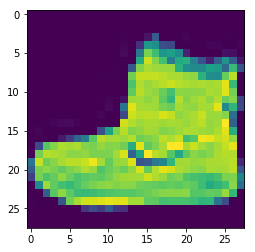

In [6]:
plt.imshow(train_images[0])


In [7]:
plt.colorbar()


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

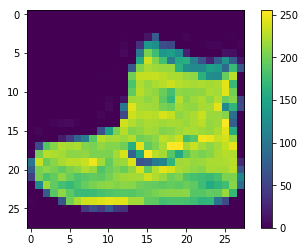

In [8]:
plt.imshow(train_images[0])
plt.colorbar()


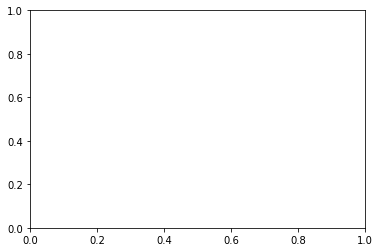

In [9]:
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

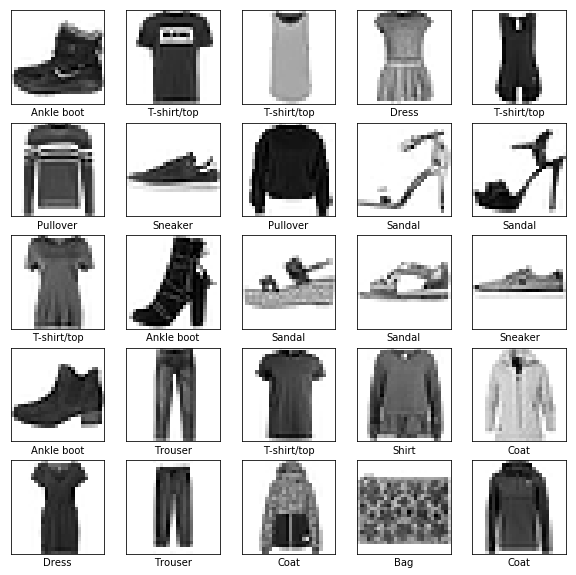

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [12]:
train_images = train_images * 255.0

test_images = test_images * 255.0

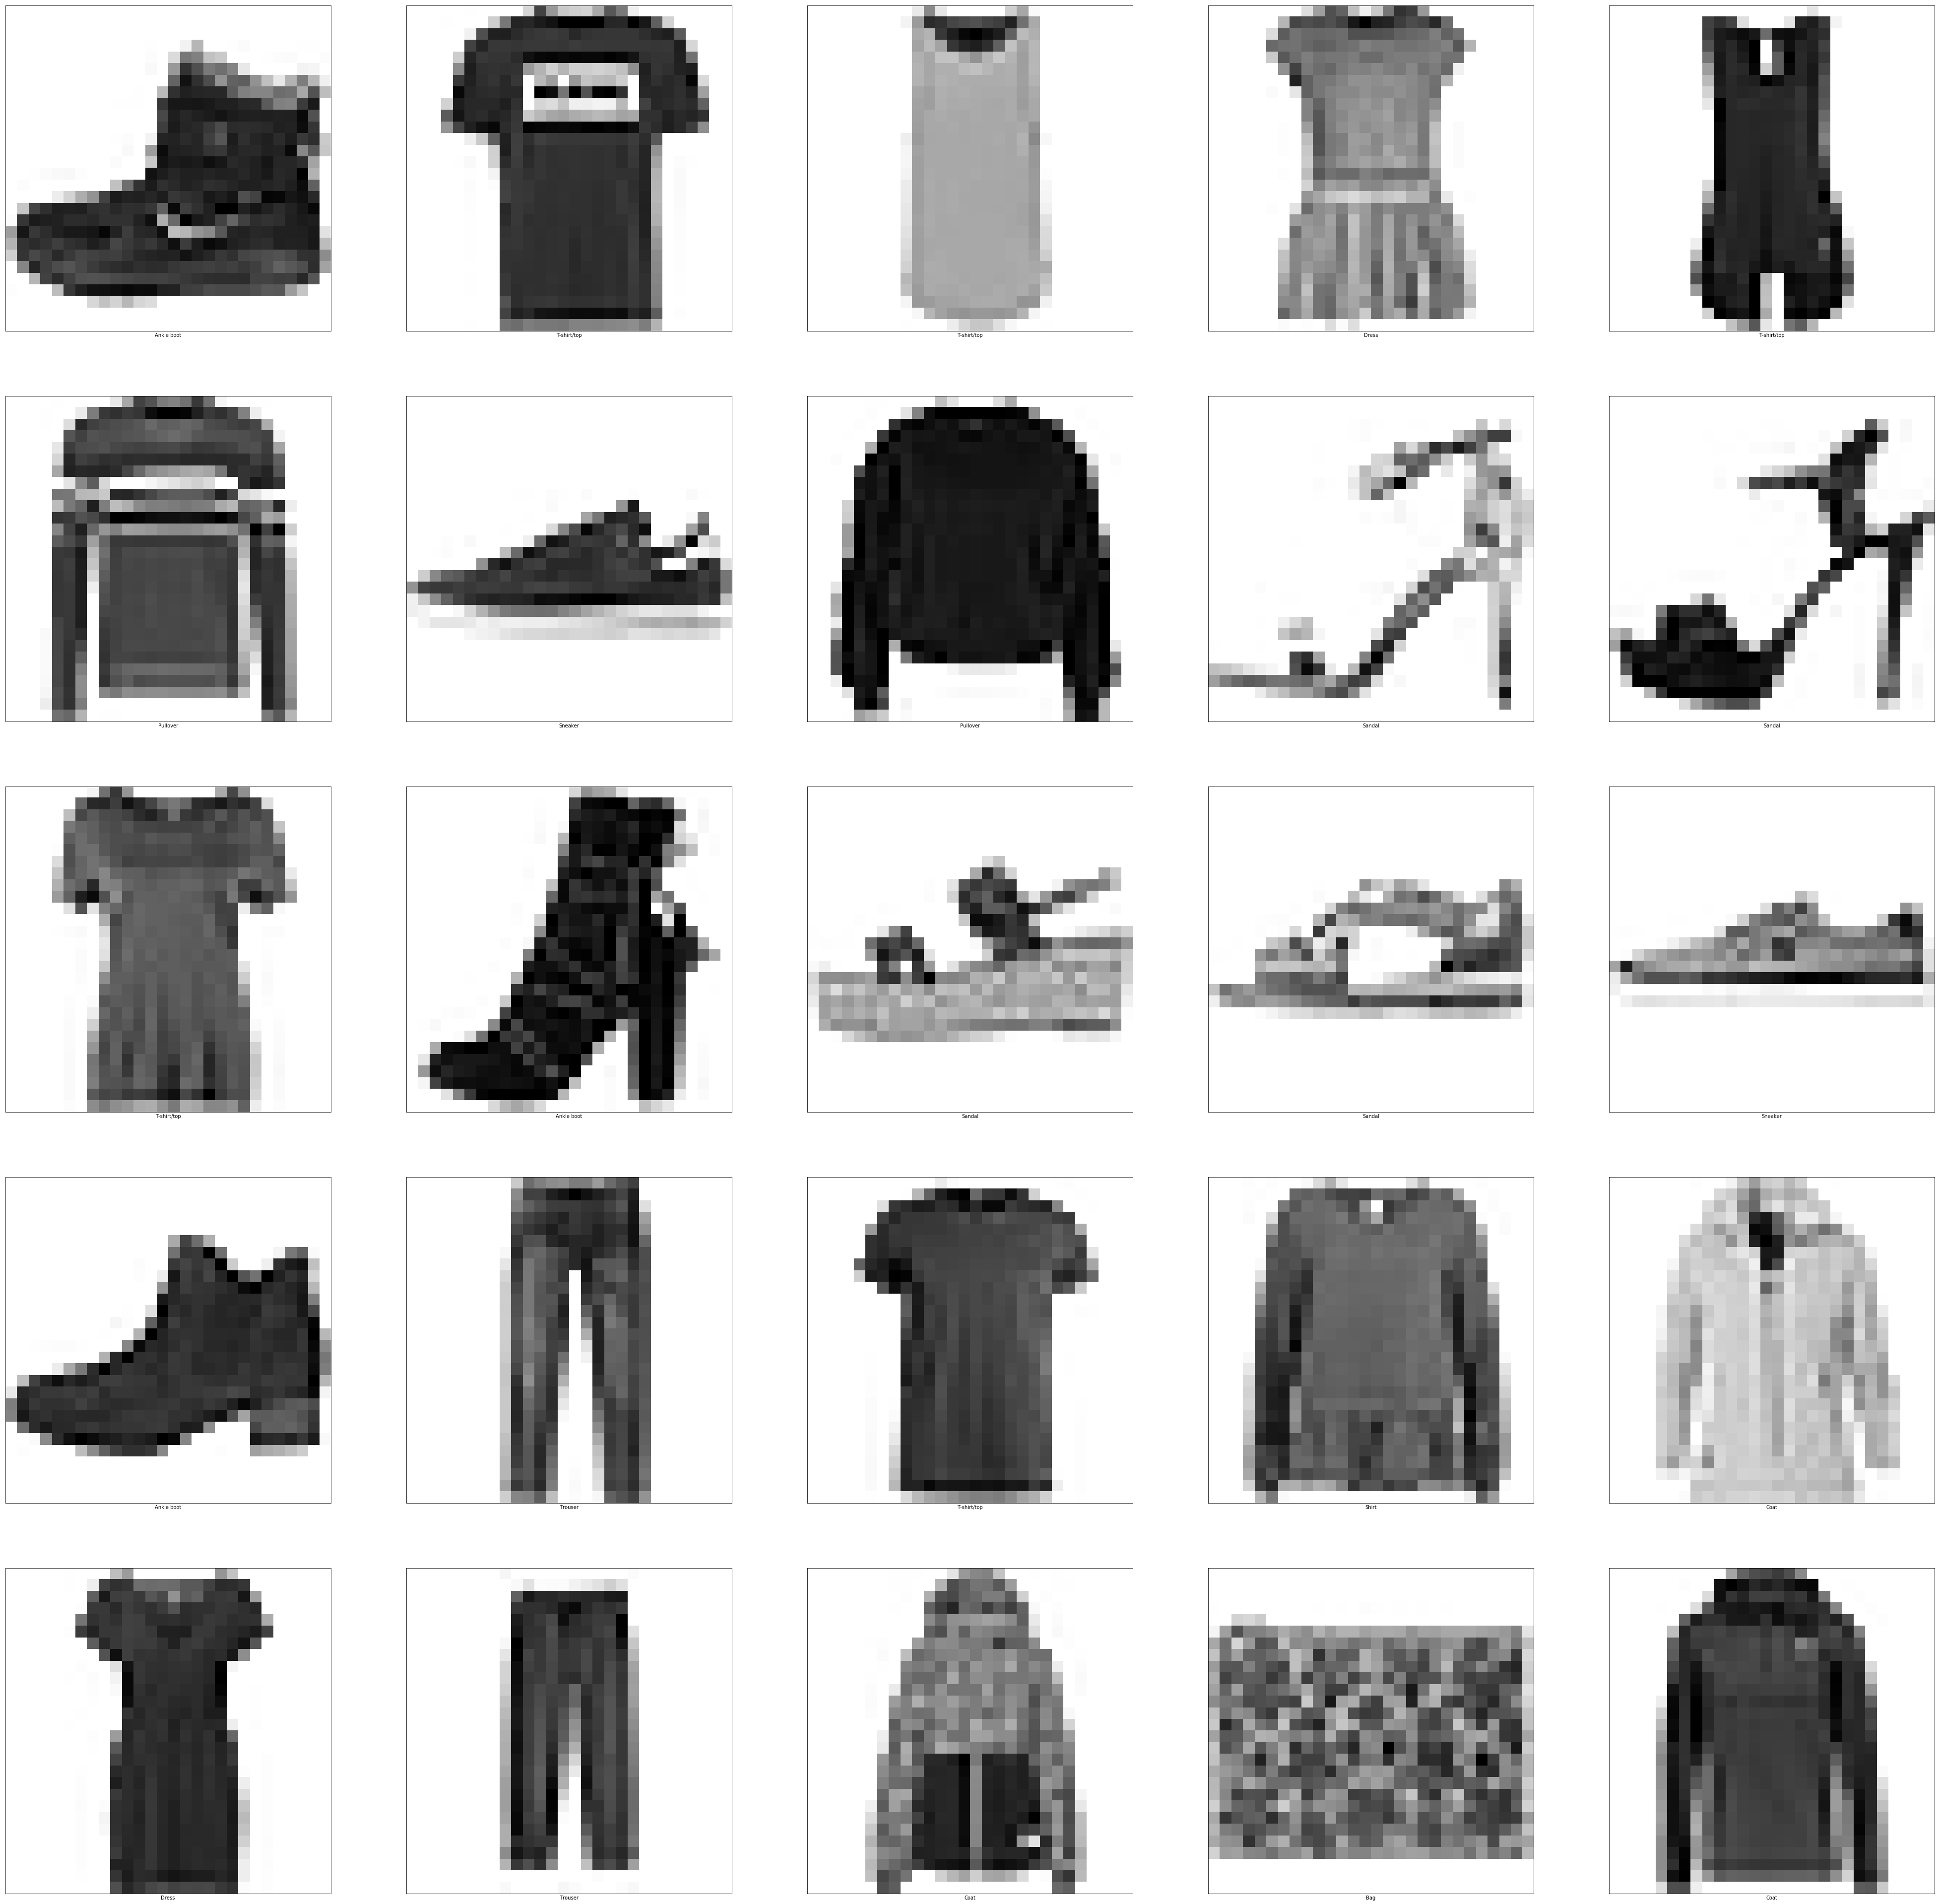

In [15]:
plt.figure(figsize=(70,70))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 43us/sample - loss: 0.4984 - accuracy: 0.8249
Epoch 2/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3734 - accuracy: 0.8667
Epoch 3/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3350 - accuracy: 0.8785
Epoch 4/10
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3123 - accuracy: 0.8846
Epoch 5/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2922 - accuracy: 0.8916
Epoch 6/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2781 - accuracy: 0.8969
Epoch 7/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2651 - accuracy: 0.9025
Epoch 8/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.2572 - accuracy: 0.9048
Epoch 9/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2469 - accuracy: 0.9075
Epoch 10/10
60

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/1 - 0s - loss: 0.2186 - accuracy: 0.8831

Test accuracy: 0.8831


In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[0]

array([3.5115264e-08, 2.2179139e-11, 3.5068309e-10, 1.2408222e-10,
       7.4840145e-10, 1.5671030e-03, 2.1154515e-08, 2.0944417e-02,
       1.6925024e-07, 9.7748828e-01], dtype=float32)